In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from sklearn import datasets 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam

In [44]:
np.random.seed(0)


In [45]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts , random_state = 123, noise = 0.1 , factor = 0.2)


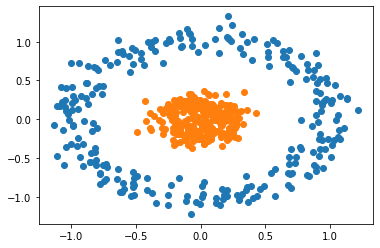

In [46]:
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [47]:
model = Sequential()
model.add(Dense(4, input_shape = (2,),activation='sigmoid'))#hidden layer hass 4 nodes and input layer has 2 nodes
model.add(Dense(1, activation='sigmoid'))#output layer has 1 node

model.compile(Adam(lr=0.01),'binary_crossentropy', metrics = ['accuracy'])#binary cross entropy is loss function
#binary_crossentropy and metric function are almost similar difference being results from loass function are backpropogated
#wheras metric acts as a tool for the evaluation of performance of a data.metric['accuracy'] measures how accurate prediction
#matches label of our data

 

In [48]:
h = model.fit(x=X, y=y, verbose = 1,batch_size = 20 ,epochs = 100,shuffle = 'true')

Epoch 1/100
25/25 [==============================] - 0s 873us/step - loss: 0.6987 - accuracy: 0.4729
Epoch 2/100
25/25 [==============================] - 0s 748us/step - loss: 0.6937 - accuracy: 0.5107
Epoch 3/100
25/25 [==============================] - 0s 814us/step - loss: 0.6931 - accuracy: 0.5287
Epoch 4/100
25/25 [==============================] - 0s 831us/step - loss: 0.6939 - accuracy: 0.4930
Epoch 5/100
25/25 [==============================] - 0s 914us/step - loss: 0.6955 - accuracy: 0.4824
Epoch 6/100
25/25 [==============================] - 0s 788us/step - loss: 0.6931 - accuracy: 0.4857
Epoch 7/100
25/25 [==============================] - 0s 997us/step - loss: 0.6950 - accuracy: 0.5247
Epoch 8/100
25/25 [==============================] - 0s 957us/step - loss: 0.6917 - accuracy: 0.3948
Epoch 9/100
25/25 [==============================] - 0s 849us/step - loss: 0.6910 - accuracy: 0.6495
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy

Text(0.5, 1.0, 'accuracy')

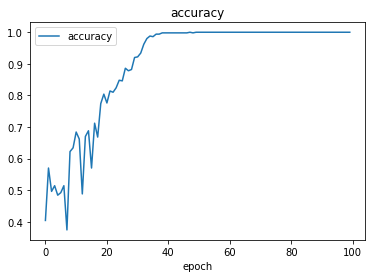

In [49]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

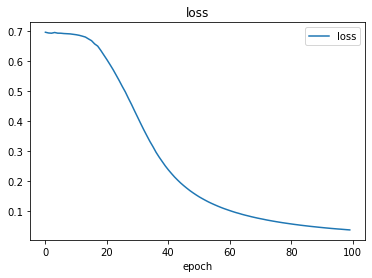

In [50]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [51]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:,0])+ 0.25 ,50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:,1]) + 0.25 , 50)

    xx,yy = np.meshgrid(x_span, y_span)
    xx_ , yy_ = xx.ravel() , yy.ravel()

    grid = np.c_[xx_ , yy_]

    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)


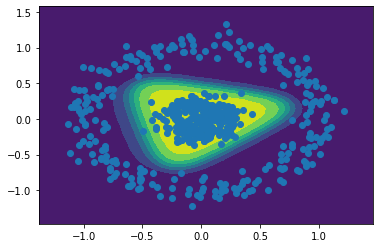

In [52]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0] ,X[n_pts:,1])

prediction is: [[0.03015995]]


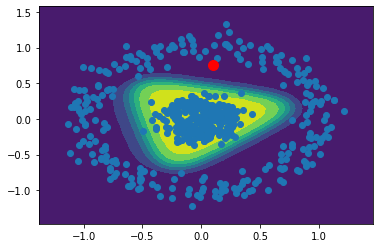

In [53]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 0.1
y = 0.76
point = np.array([[x,y]])
prediction = model.predict(point)

plt.plot([x],[y],marker='o',markersize = 10,color='red')
print("prediction is:",prediction)